In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('housingtrain.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType','SalePrice','Street'])
df.head()

,Street,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Pave,Gd,NaN,Attchd,208500
1,Pave,Gd,TA,Attchd,181500
2,Pave,Gd,TA,Attchd,223500
3,Pave,TA,Gd,Detchd,140000
4,Pave,Gd,TA,Attchd,250000


## "Rare" Label Imputation
In this technique we see how to deal with labels of a categorical variable which appears rarely. There is no fixed technique to determine the rare labels. However the threshold to deem a label as a rare label must be done after thorough inspection of EDA in terms of response variable variation. In implementing this technique we may encounter three scenarios usually:

a.) One predominant Category
b.) Small number of Categories
c.) Categories with high cardinality

## One Predominant Category Label
In this scenario we encounter the categorical variable with one dominant labels and other labels of small proportion. The best example is the 'Street' variable. Here we are initially checking the response variable patterns against the labels of the categorical variable. Besides we are checking the value counts in subsequent lines of code. 

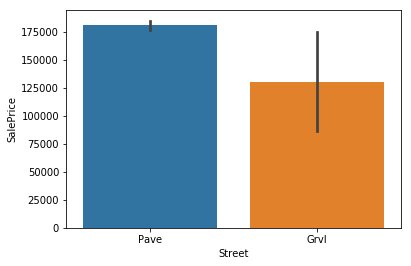

In [6]:
sns.barplot(x=df['Street'],y=df['SalePrice'])
plt.show()

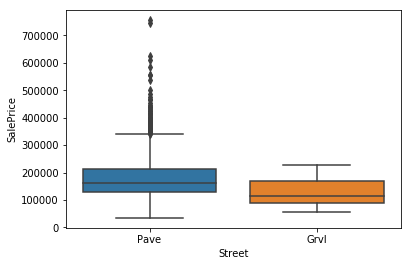

In [7]:
sns.boxplot(x=df['Street'],y=df['SalePrice'])
plt.show()

In [4]:
 print(df.groupby('Street')['SalePrice'].mean())

Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64


In [5]:
print(df['Street'].value_counts()/len(df))

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64


In [17]:
dom_cat=list()
dom_cat.append(df['Street'].value_counts().sort_values(ascending=False).index[0])
#dom_cat=list(dom_cat)
dom_cat

['Pave']

In [20]:
tempdf=df['Street'].value_counts()/len(df)
df['Street_dom']=np.where(df['Street'].isin(dom_cat),df['Street'],dom_cat[0])

In [22]:
df['Street_dom'].value_counts()/len(df)

Pave    1.0
Name: Street_dom, dtype: float64

## Note
In the above code we can see that there are just 6 observations where 'Street'='Grvl' and we are replacing it with 'Pave' to avoid overfitting. In this case "rare" category substituion does not make any sense as our main goal is to reduce the number of labels with minimal information loss

## Small number of Categories

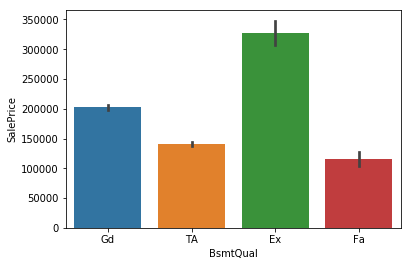

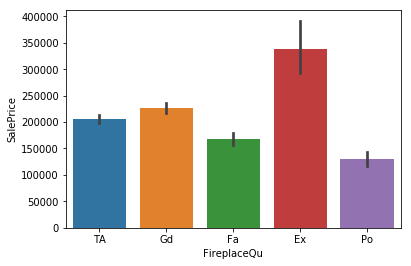

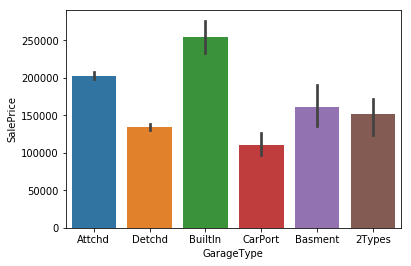

In [8]:
for col in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    sns.barplot(x=df[col],y=df['SalePrice'],)
    plt.show()

In [11]:
for col in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    print(df.groupby(col)['SalePrice'].mean())

BsmtQual
Ex    327041.041322
Fa    115692.028571
Gd    202688.478964
TA    140759.818182
Name: SalePrice, dtype: float64
FireplaceQu
Ex    337712.500000
Fa    167298.484848
Gd    226351.415789
Po    129764.150000
TA    205723.488818
Name: SalePrice, dtype: float64
GarageType
2Types     151283.333333
Attchd     202892.656322
Basment    160570.684211
BuiltIn    254751.738636
CarPort    109962.111111
Detchd     134091.162791
Name: SalePrice, dtype: float64


In [10]:
for col in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    print(df[col].value_counts()/len(df))

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64
Gd    0.260274
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: FireplaceQu, dtype: float64
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64


## Converting the categories which are present <10% to rare categories
In this block of code we will convert the categories which are present less than 10 percent to rare categories. However we must choose the threshold after a thorough inspection in EDA. The rare categories must be grouped only if they have same effect on the response variable. If the response is erratic then the labels must be grouped based on the response pattern

In [4]:
for col in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    tempdf=df[col].value_counts()/len(df)
    rare_cat=[x for x in tempdf.loc[tempdf<=0.10].index.values]
    df[col+'_rare']=np.where(df[col].isin(rare_cat),"rare",df[col])

In [5]:
for col in ['BsmtQual_rare','FireplaceQu_rare','GarageType_rare']:
            print(df[col].value_counts()/len(df))

TA      0.444521
Gd      0.423288
rare    0.106849
Name: BsmtQual_rare, dtype: float64
Gd      0.260274
TA      0.214384
rare    0.052740
Name: FireplaceQu_rare, dtype: float64
Attchd    0.595890
Detchd    0.265068
rare      0.083562
Name: GarageType_rare, dtype: float64


### Note
Here the patterns of the response variables are not taken into account. But if we inspect our EDA in the visualizations we can see that the when 'BsmtQual' an 'FirePlaceQu' is Ex then the mean saleprice is high. Similarly when 'GarageType' is builtin the mean 'SalePrice' is high. So it is better to preserve these labels

In [12]:
for col in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    tempdf=df[col].value_counts()/len(df)
    rare_cat=[x for x in tempdf.loc[tempdf<=0.05].index.values]
    df[col+'_rare']=np.where(df[col].isin(rare_cat),"rare",df[col])

In [13]:
for col in ['BsmtQual_rare','FireplaceQu_rare','GarageType_rare']:
            print(df[col].value_counts()/len(df))

TA      0.444521
Gd      0.423288
Ex      0.082877
rare    0.023973
Name: BsmtQual_rare, dtype: float64
Gd      0.260274
TA      0.214384
rare    0.052740
Name: FireplaceQu_rare, dtype: float64
Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
rare       0.023288
Name: GarageType_rare, dtype: float64


### Note
In the 'BsmtQual_rare' we can see that the 'Fa' label is replaced by 'rare' which does not make any sense. So we can exempt this column from implementing this substitution with 'rare' categories.

## High Cardinality
In this scenario we have categorical variables which has high cardinality meaning high labels and this is the case where our technique of "rare" value imputation comes to rescue. However as discussed before we need to substitute the rare labels only after carefully checking the patterns with the target variable.

In [24]:
df=pd.read_csv('merctrain.csv',usecols=['X1','X2','X3','X6','y'])
df.head()

,y,X1,X2,X3,X6
0,130.81,v,at,a,j
1,88.53,t,av,e,l
2,76.26,w,n,c,j
3,80.62,t,n,f,l
4,78.02,v,n,f,d


In [27]:
for col in ['X1','X2','X3','X6']:
    print(df[col].value_counts()/len(df))

aa    0.197909
s     0.142077
b     0.140651
l     0.140176
v     0.096935
r     0.059634
i     0.048230
a     0.033975
c     0.028748
o     0.019482
w     0.012354
z     0.010929
u     0.008791
e     0.007840
m     0.007603
t     0.007365
h     0.006890
f     0.005464
y     0.005464
j     0.005227
n     0.004514
k     0.004039
p     0.002138
g     0.001426
ab    0.000713
q     0.000713
d     0.000713
Name: X1, dtype: float64
as    0.394155
ae    0.117843
ai    0.098598
m     0.087194
ak    0.062960
r     0.036351
n     0.032549
s     0.022333
f     0.020670
e     0.019244
aq    0.014968
ay    0.012830
a     0.011167
t     0.006890
k     0.005940
i     0.005940
b     0.004989
ao    0.004752
ag    0.004514
z     0.004514
d     0.004277
ac    0.003089
g     0.002851
ap    0.002613
y     0.002613
x     0.002376
aw    0.001901
at    0.001426
h     0.001426
al    0.001188
q     0.001188
an    0.001188
av    0.000950
p     0.000950
ah    0.000950
au    0.000713
af    0.000238
aa    0.000238


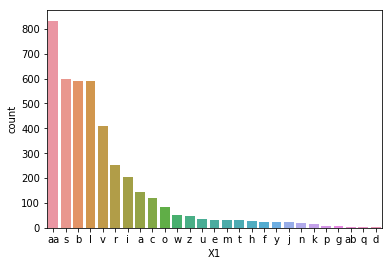

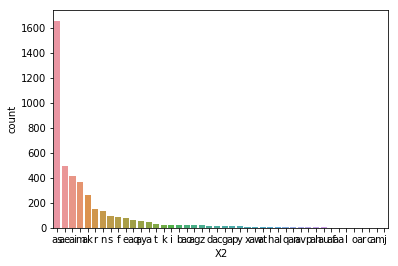

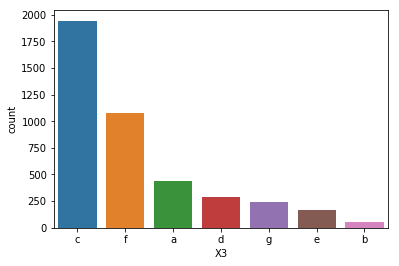

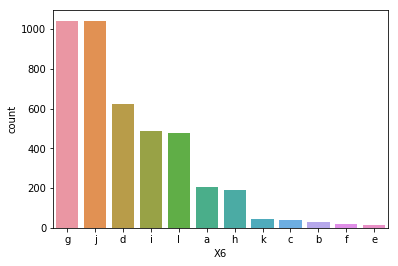

In [30]:
for col in ['X1','X2','X3','X6']:
    sns.countplot(df[col],order = df[col].value_counts().index)
    plt.show()

In [32]:
for col in ['X1','X2','X3','X6']:
    tempdf=df[col].value_counts()/len(df)
    dom_cat=[x for x in tempdf.loc[tempdf>0.10].index.values]
    df[col+'_rare']=np.where(df[col].isin(dom_cat),df[col],"rare")

In [33]:
df.head()

,y,X1,X2,X3,X6,X1_rare,X2_rare,X3_rare,X6_rare
0,130.81,v,at,a,j,rare,rare,a,j
1,88.53,t,av,e,l,rare,rare,rare,l
2,76.26,w,n,c,j,rare,rare,c,j
3,80.62,t,n,f,l,rare,rare,f,l
4,78.02,v,n,f,d,rare,rare,f,d


In [34]:
for col in ['X1_rare','X2_rare','X3_rare','X6_rare']:
    print(df[col].value_counts()/len(df))

rare    0.379187
aa      0.197909
s       0.142077
b       0.140651
l       0.140176
Name: X1_rare, dtype: float64
rare    0.488002
as      0.394155
ae      0.117843
Name: X2_rare, dtype: float64
c       0.461392
f       0.255643
rare    0.178427
a       0.104538
Name: X3_rare, dtype: float64
g       0.247565
j       0.246852
d       0.148491
rare    0.127584
i       0.115942
l       0.113566
Name: X6_rare, dtype: float64


## Note
From the above code we can infer that even for the categorical values which has more than 50 categories by grouping the labels which are present less than 10 percent as rare labels we have reduced the cardinality of the variable very effectively. This will be materialistic in terms of feature engineering and model performance